## Solar Radiation Data: Exploratory Data Analysis

This notebook explores the solar radiation dataset, covering tasks such as data quality checks, summary statistics, and visualization of trends.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_path = "data/sierraleone-bumbuna.csv"
df = pd.read_csv(data_path)


In [22]:
def plot_time_series(df, columns):
    if 'Timestamp' not in df.columns:
        print("Error: 'Timestamp' column not found in DataFrame.")
        return

    if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
        print("Converting 'Timestamp' to datetime format.")
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    missing_cols = [col for col in columns if col not in df.columns]
    if missing_cols:
        print(f"Error: Columns {missing_cols} not found in DataFrame.")
        return

    df.plot(x='Timestamp', y=columns, figsize=(10, 6))
    plt.title("Time Series Analysis")
    plt.xlabel("Timestamp")
    plt.ylabel("Values")
    plt.show()


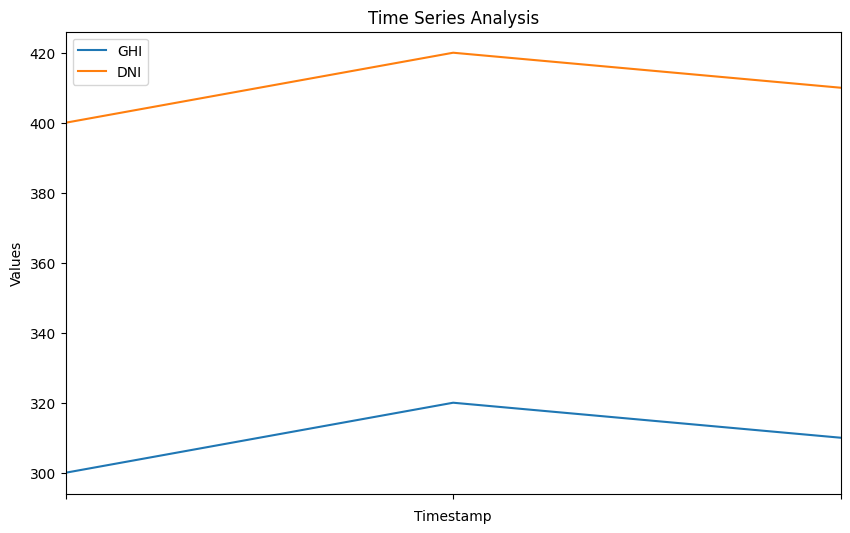

In [23]:
data = {
    "Timestamp": ["2024-12-11 10:00", "2024-12-11 11:00", "2024-12-11 12:00"],
    "GHI": [300, 320, 310],
    "DNI": [400, 420, 410]
}
df = pd.DataFrame(data)

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Call the function
plot_time_series(df, ['GHI', 'DNI'])


In [20]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

print(df.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [8]:
def plot_temp_vs_humidity(df):
    sns.scatterplot(data=df, x='RH', y='Tamb', hue='GHI')
    plt.title("Temperature vs. Humidity")
    plt.show()


In [9]:
def plot_bubble_chart(df):
    plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
    plt.xlabel('GHI')
    plt.ylabel('Tamb')
    plt.title("Bubble Chart: GHI vs Tamb vs RH")
    plt.show()
